In [1]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 1 Importando a Tabela

In [45]:
#base = pd.read_csv(r"D:\PosFIAP\ArquivosTC4\Obesity.csv", sep=',')
base = pd.read_csv(r"https://raw.githubusercontent.com/vbomura/TC4Final/refs/heads/main/arquivos/Obesity.csv", sep=',')
base.head(10)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


## 1.1 Informações básicas

In [3]:
base.describe().round(2)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


In [4]:
# Vamos renomear as colunas
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [5]:
# Pelo menos não temos colunas com dados nulos
base.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

## 1.2 Tratando a base

### 1.2.1 Renomeando as colunas

In [6]:
base.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
base.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

Import para criação de Pipeline

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

## Criando classes para a tratamento dos dados da planilha de obsidade

In [9]:
#Alterando nomes das colunas
class RenomearColunasTransf(BaseEstimator, TransformerMixin):
    def __init__(self, columns_map=None):
        columns_map = {'Gender':'genero',
                'Age':'idade',
                'Height':'altura',
                'Weight':'peso',
                'family_history':'historico_familiar',
                'FAVC':'calorias_frequente',
                'FCVC':'vegetais_refeicao',
                'NCP':'refeicoes_diaria',
                'CAEC':'entre_refeicao',
                'SMOKE':'fuma',
                'CH2O':'litros_agua',
                'SCC':'monitora_calorias',
                'FAF':'frequencia_atividade',
                'TUE':'tempo_tecnologia',
                'CALC':'frequencia_alcool',
                'MTRANS':'transporte_usado',
                'Obesity':'nvl_obsidade'}
        self.columns_map = columns_map if columns_map is not None else {}

    def fit(self, X, y=None):
        # Nada a aprender, apenas retorna o próprio objeto
        return self

    def transform(self, X):
        X_ = X.copy()
        X_.rename(columns=self.columns_map, inplace=True)
        return X_
    

In [10]:
class MultiLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        """
        columns: lista de colunas a codificar com LabelEncoder
        """
        self.columns = columns
        self.encoders = {}

    def fit(self, X, y=None):
        X_ = X.copy()
        for col in self.columns:
            le = LabelEncoder()
            le.fit(X_[col])
            self.encoders[col] = le
        return self

    def transform(self, X):
        X_ = X.copy()
        for col, le in self.encoders.items():
            X_[f"{col}_cod"] = le.transform(X_[col])
        return X_

In [11]:
class YesNoToBinaryTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        columns = ['historico_familiar', 'calorias_frequente', 'fuma', 'monitora_calorias']
        self.columns = columns

    def fit(self, X, y=None):
        # Nada a aprender, apenas retorna o próprio transformer
        return self

    def transform(self, X):
        X_ = X.copy()

        mapping = {'yes': 1, 'no': 0}

        # Converte apenas as colunas selecionadas
        for col in self.columns:
            if col in X_.columns:
                X_[col] = X_[col].map(mapping)

        return X_

In [12]:
"""     def __init__(self,min_max_scaler=['idade','altura','peso','vegetais_refeicao','refeicoes_diaria','litros_agua','frequencia_atividade']): """
class MinMax(BaseEstimator, TransformerMixin):
    def __init__(self,min_max_scaler=['vegetais_refeicao','refeicoes_diaria','litros_agua','frequencia_atividade']):
        self.min_max_scaler = min_max_scaler

    def fit(self, df):
        return self
    
    def transform(self, df):
        if(set(self.min_max_scaler).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler] = min_max_enc.fit_transform(df[self.min_max_scaler])
            return df
        else:
            print('Uma ou mais colunas não existentes, por favor verifique!')
            return df

In [13]:
class OrdinalEncodingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, encoding_map=None):
        encoding_map = {
            "entre_refeicao": ["no", "Sometimes", "Frequently", "Always"],
            "frequencia_alcool": ["no", "Sometimes", "Frequently", "Always"],
            "nvl_obsidade": [
                "Insufficient_Weight",
                "Normal_Weight",
                "Overweight_Level_I",
                "Overweight_Level_II",
                "Obesity_Type_I",
                "Obesity_Type_II",
                "Obesity_Type_III"
            ]
        }
        self.encoding_map = encoding_map
        self.encoders = {}

    def fit(self, X, y=None):
        X_ = X.copy()

        for col, ordem in self.encoding_map.items():
            enc = OrdinalEncoder(
                categories=[ordem],
                handle_unknown='use_encoded_value',
                unknown_value=-1
            )
            enc.fit(X_[[col]])
            self.encoders[col] = enc

        return self

    def transform(self, X):
        X_ = X.copy()

        for col, enc in self.encoders.items():
            X_[f"{col}_ord"] = enc.transform(X_[[col]])

        return X_

In [14]:
class DummyEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, prefix=None, drop_first=False):
        columns=["transporte_usado"]
        prefix="transporte"
        self.columns = columns
        self.prefix = prefix
        self.drop_first = drop_first
        self.dummy_columns = None  # será definido no fit

    def fit(self, X, y=None):
        X_ = X.copy()
        dummies = pd.get_dummies(
            X_,
            columns=self.columns,
            prefix=self.prefix,
            drop_first=self.drop_first
        )
        self.dummy_columns = dummies.columns  # guardamos as colunas finais do fit
        return self

    def transform(self, X):
        X_ = X.copy()
        dummies = pd.get_dummies(
            X_,
            columns=self.columns,
            prefix=self.prefix,
            drop_first=self.drop_first
        )

        # Garante que tenham as mesmas colunas do fit()
        for col in self.dummy_columns:
            if col not in dummies:
                dummies[col] = 0

        # Remove colunas extras que não existiam no fit
        dummies = dummies[self.dummy_columns]

        return dummies

In [15]:
class ColumnsToIntTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        columns = [
            "transporte_Automobile",
            "transporte_Bike",
            "transporte_Motorbike",
            "transporte_Public_Transportation",
            "transporte_Walking"
        ]        
        self.columns = columns

    def fit(self, X, y=None):
        return self  # Nada para ajustar

    def transform(self, X):
        X_ = X.copy()
        for col in self.columns:
            if col in X_.columns:
                X_[col] = X_[col].astype(int)
        return X_

In [16]:
pipeline = Pipeline([
    ('renomear', RenomearColunasTransf()),
    ('min_max_scaler',MinMax()),
    ('ordinal_feature', OrdinalEncodingTransformer()),
    ('label_encoding', MultiLabelEncoder(
        columns=[
            'historico_familiar',
            'calorias_frequente',
            'fuma',
            'genero',
            'monitora_calorias'
        ]
    )),
    #('transformarBinario',YesNoToBinaryTransformer()), #ja esta tratado no MultiLabelEncoder
    ('onehot_transporte', DummyEncoderTransformer()),
    ('ajustandoColunasTransporte',ColumnsToIntTransformer()),
    # ... outros transformers ou modelos ...
])

base = pipeline.fit_transform(base)

In [17]:
base.head()

,genero,idade,altura,peso,historico_familiar,calorias_frequente,vegetais_refeicao,refeicoes_diaria,entre_refeicao,fuma,...,historico_familiar_cod,calorias_frequente_cod,fuma_cod,genero_cod,monitora_calorias_cod,transporte_Automobile,transporte_Bike,transporte_Motorbike,transporte_Public_Transportation,transporte_Walking
0,Female,21.0,1.62,64.0,yes,no,0.5,0.666667,Sometimes,no,...,1,0,0,0,0,0,0,0,1,0
1,Female,21.0,1.52,56.0,yes,no,1.0,0.666667,Sometimes,yes,...,1,0,1,0,1,0,0,0,1,0
2,Male,23.0,1.80,77.0,yes,no,0.5,0.666667,Sometimes,no,...,1,0,0,1,0,0,0,0,1,0
3,Male,27.0,1.80,87.0,no,no,1.0,0.666667,Sometimes,no,...,0,0,0,1,0,0,0,0,0,1
4,Male,22.0,1.78,89.8,no,no,0.5,0.000000,Sometimes,no,...,0,0,0,1,0,0,0,0,1,0


### 1.2.3 Colocando labels

In [18]:
# Temos algumas variáveis que são string, dito isso elas são repostas limitas, então vamos colacar labels nelas para possivelmente usá-las no algoritmo
genero = base['genero'].unique()
historico_familiar = base['historico_familiar'].unique()
calorias_frequente = base['calorias_frequente'].unique()
entre_refeicao = base['entre_refeicao'].unique()
fuma = base['fuma'].unique()
frequencia_alcool = base['frequencia_alcool'].unique()
#transporte_usado = base['transporte_usado'].unique()
nvl_obsidade = base['nvl_obsidade'].unique()

# Repostas binárias
print("Respostas genero: ", genero)
print("Respostas histórico familiar: ", historico_familiar)
print("Respostas consome calorias com frequência: ", calorias_frequente)
print("Respostas se fuma: ", fuma)


#Respostas com grau entre elas (maior ou menor que a outra)
print("Respostas come entre refeições: ", entre_refeicao)
print("Respostas bebe alcool com frequência: ", frequencia_alcool)
print("Respostas obesidade: ", nvl_obsidade)

#Resposta sem relação (teoricamente tem uma relação, uma é melhor poderia ser melhor que a outra, mas a diferença é mais difícil de ver, então achei melhor considerar sem)
#print("Respostas qual transporte usado: ", transporte_usado)

Respostas genero:  ['Female' 'Male']
Respostas histórico familiar:  ['yes' 'no']
Respostas consome calorias com frequência:  ['no' 'yes']
Respostas se fuma:  ['no' 'yes']
Respostas come entre refeições:  ['Sometimes' 'Frequently' 'Always' 'no']
Respostas bebe alcool com frequência:  ['no' 'Sometimes' 'Frequently' 'Always']
Respostas obesidade:  ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [19]:
base.head()

,genero,idade,altura,peso,historico_familiar,calorias_frequente,vegetais_refeicao,refeicoes_diaria,entre_refeicao,fuma,...,historico_familiar_cod,calorias_frequente_cod,fuma_cod,genero_cod,monitora_calorias_cod,transporte_Automobile,transporte_Bike,transporte_Motorbike,transporte_Public_Transportation,transporte_Walking
0,Female,21.0,1.62,64.0,yes,no,0.5,0.666667,Sometimes,no,...,1,0,0,0,0,0,0,0,1,0
1,Female,21.0,1.52,56.0,yes,no,1.0,0.666667,Sometimes,yes,...,1,0,1,0,1,0,0,0,1,0
2,Male,23.0,1.80,77.0,yes,no,0.5,0.666667,Sometimes,no,...,1,0,0,1,0,0,0,0,1,0
3,Male,27.0,1.80,87.0,no,no,1.0,0.666667,Sometimes,no,...,0,0,0,1,0,0,0,0,0,1
4,Male,22.0,1.78,89.8,no,no,0.5,0.000000,Sometimes,no,...,0,0,0,1,0,0,0,0,1,0


# 2 Analise da base

## 2.1 Utils

In [20]:
colunas_usaveis = [
 'idade',
 'altura',
 'peso',
 'vegetais_refeicao',
 'refeicoes_diaria',
 'litros_agua',
 'frequencia_atividade',
 'tempo_tecnologia',
 'historico_familiar_cod',
 'calorias_frequente_cod',
 'fuma_cod',
 'genero_cod',
 'entre_refeicao_ord',
 'frequencia_alcool_ord',
 'nvl_obsidade_ord',
 'transporte_Automobile',
 'transporte_Bike',
 'transporte_Motorbike',
 'transporte_Public_Transportation',
 'transporte_Walking'
]

In [21]:
base.head(10)

,genero,idade,altura,peso,historico_familiar,calorias_frequente,vegetais_refeicao,refeicoes_diaria,entre_refeicao,fuma,...,historico_familiar_cod,calorias_frequente_cod,fuma_cod,genero_cod,monitora_calorias_cod,transporte_Automobile,transporte_Bike,transporte_Motorbike,transporte_Public_Transportation,transporte_Walking
0,Female,21.0,1.62,64.0,yes,no,0.5,0.666667,Sometimes,no,...,1,0,0,0,0,0,0,0,1,0
1,Female,21.0,1.52,56.0,yes,no,1.0,0.666667,Sometimes,yes,...,1,0,1,0,1,0,0,0,1,0
2,Male,23.0,1.80,77.0,yes,no,0.5,0.666667,Sometimes,no,...,1,0,0,1,0,0,0,0,1,0
3,Male,27.0,1.80,87.0,no,no,1.0,0.666667,Sometimes,no,...,0,0,0,1,0,0,0,0,0,1
4,Male,22.0,1.78,89.8,no,no,0.5,0.000000,Sometimes,no,...,0,0,0,1,0,0,0,0,1,0
5,Male,29.0,1.62,53.0,no,yes,0.5,0.666667,Sometimes,no,...,0,1,0,1,0,1,0,0,0,0
6,Female,23.0,1.50,55.0,yes,yes,1.0,0.666667,Sometimes,no,...,1,1,0,0,0,0,0,1,0,0
7,Male,22.0,1.64,53.0,no,no,0.5,0.666667,Sometimes,no,...,0,0,0,1,0,0,0,0,1,0
8,Male,24.0,1.78,64.0,yes,yes,1.0,0.666667,Sometimes,no,...,1,1,0,1,0,0,0,0,1,0
9,Male,22.0,1.72,68.0,yes,yes,0.5,0.666667,Sometimes,no,...,1,1,0,1,0,0,0,0,1,0


Percentual dos niveis de obsidade

In [22]:
base['nvl_obsidade_ord'].value_counts(normalize=True)*100

nvl_obsidade_ord
4.0    16.627191
6.0    15.348176
5.0    14.069162
2.0    13.737565
3.0    13.737565
1.0    13.595452
0.0    12.884889
Name: proportion, dtype: float64

In [23]:
# Exportar para Excel
#base.to_excel('dados2.xlsx', index=False)

In [24]:
#Criando dataframe backup pois algumas colunas não devemos utilizar 
###VERIFICAR SE AINDA TEMOS ESTAS COLUNAS

baseBKP = base

#base = base.loc[:, base.columns.difference(['historico_familiar_cod','calorias_frequente_cod','fuma_cod','genero','vegetais_refeicao', 'entre_refeicao','frequencia_alcool','nvl_obsidade','entre_refeicao_ord','frequencia_alcool_ord'])]
#base = base.loc[:, base.columns.difference(['historico_familiar_cod','fuma_cod','genero', 'entre_refeicao','frequencia_alcool','nvl_obsidade','frequencia_alcool_ord','monitora_calorias','monitora_calorias_cod'])]

In [25]:
base.head()

,genero,idade,altura,peso,historico_familiar,calorias_frequente,vegetais_refeicao,refeicoes_diaria,entre_refeicao,fuma,...,historico_familiar_cod,calorias_frequente_cod,fuma_cod,genero_cod,monitora_calorias_cod,transporte_Automobile,transporte_Bike,transporte_Motorbike,transporte_Public_Transportation,transporte_Walking
0,Female,21.0,1.62,64.0,yes,no,0.5,0.666667,Sometimes,no,...,1,0,0,0,0,0,0,0,1,0
1,Female,21.0,1.52,56.0,yes,no,1.0,0.666667,Sometimes,yes,...,1,0,1,0,1,0,0,0,1,0
2,Male,23.0,1.80,77.0,yes,no,0.5,0.666667,Sometimes,no,...,1,0,0,1,0,0,0,0,1,0
3,Male,27.0,1.80,87.0,no,no,1.0,0.666667,Sometimes,no,...,0,0,0,1,0,0,0,0,0,1
4,Male,22.0,1.78,89.8,no,no,0.5,0.000000,Sometimes,no,...,0,0,0,1,0,0,0,0,1,0


## 2.2 Analisando correlação das variáveis com a target

In [26]:
corr = base[colunas_usaveis].corr()


In [27]:
corr.head()

,idade,altura,peso,vegetais_refeicao,refeicoes_diaria,litros_agua,frequencia_atividade,tempo_tecnologia,historico_familiar_cod,calorias_frequente_cod,fuma_cod,genero_cod,entre_refeicao_ord,frequencia_alcool_ord,nvl_obsidade_ord,transporte_Automobile,transporte_Bike,transporte_Motorbike,transporte_Public_Transportation,transporte_Walking
idade,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931,0.205725,0.063902,0.091987,0.048394,-0.083739,0.044487,0.282913,0.604683,0.003652,0.020286,-0.554448,-0.063064
altura,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912,0.247684,0.178364,0.055499,0.618466,-0.048818,0.129732,0.133565,0.077851,0.028996,-0.010471,-0.089684,0.036951
peso,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561,0.496820,0.272300,0.025746,0.161668,-0.287493,0.206677,0.913251,-0.013619,-0.021745,-0.037300,0.059332,-0.100805
vegetais_refeicao,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135,0.040372,-0.027283,0.014320,-0.274505,0.054670,0.060781,0.227759,-0.061049,-0.029843,-0.007512,0.057966,0.013991
refeicoes_diaria,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326,0.071370,-0.007000,0.007811,0.067600,0.097801,0.071747,0.026690,0.053424,0.023312,0.003875,-0.056849,0.006502


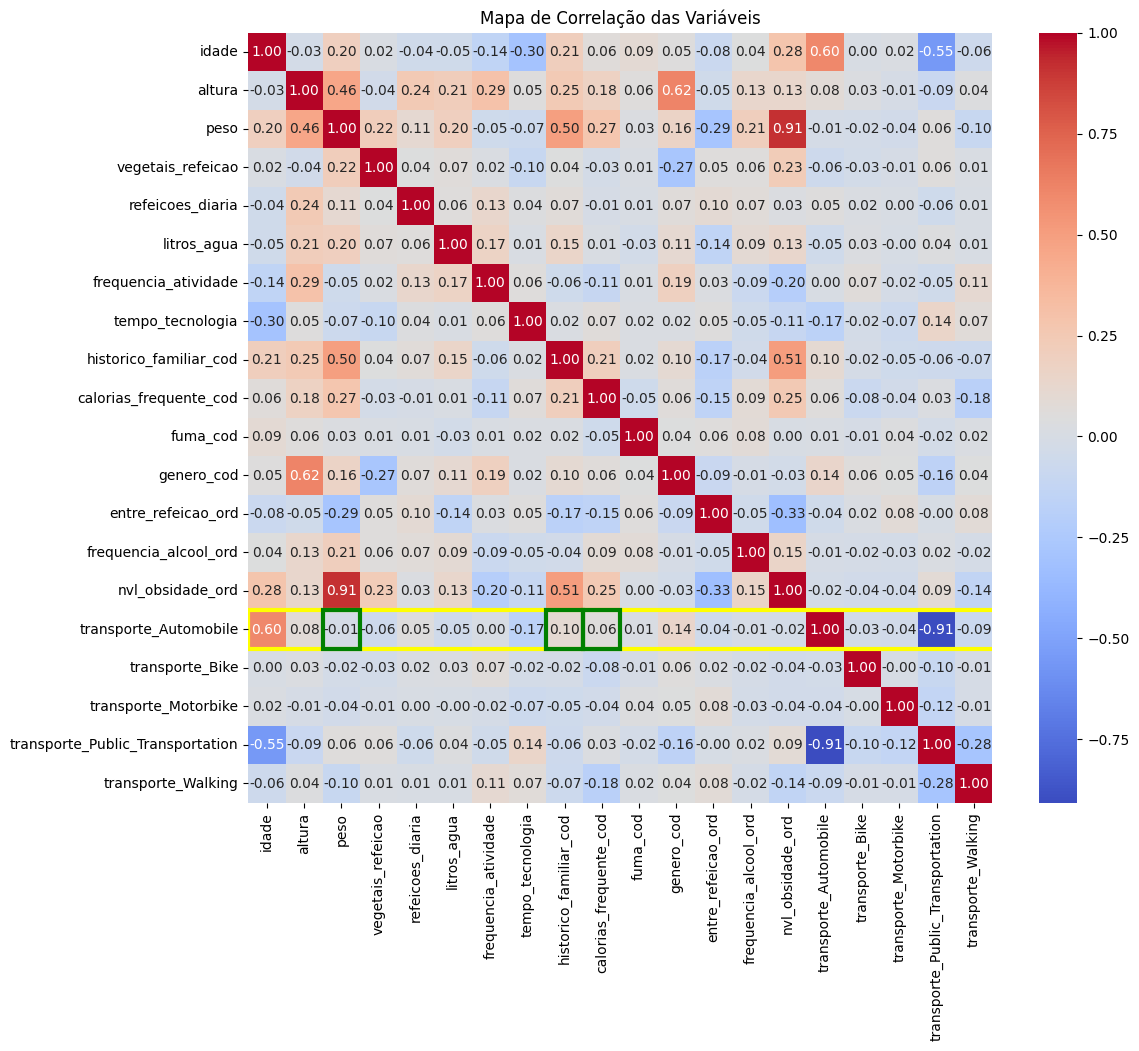

In [28]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação das Variáveis")

pontos = [(2,15), (8,15), (9,15)] 

rect = patches.Rectangle((0,15), 21,1, fill=False, edgecolor='yellow', lw=3) #adiciona uma ajuda visual para a nossa target
ax.add_patch(rect)

for i in range(len(pontos)):
    rect = patches.Rectangle(pontos[i], 1,1, fill=False, edgecolor='green', lw=3) #adiciona uma ajuda visual para a nossa target
    ax.add_patch(rect)

plt.show()

# 3 PIPELINE

## 3.1 Separando massa

In [29]:
base.head(10)

,genero,idade,altura,peso,historico_familiar,calorias_frequente,vegetais_refeicao,refeicoes_diaria,entre_refeicao,fuma,...,historico_familiar_cod,calorias_frequente_cod,fuma_cod,genero_cod,monitora_calorias_cod,transporte_Automobile,transporte_Bike,transporte_Motorbike,transporte_Public_Transportation,transporte_Walking
0,Female,21.0,1.62,64.0,yes,no,0.5,0.666667,Sometimes,no,...,1,0,0,0,0,0,0,0,1,0
1,Female,21.0,1.52,56.0,yes,no,1.0,0.666667,Sometimes,yes,...,1,0,1,0,1,0,0,0,1,0
2,Male,23.0,1.80,77.0,yes,no,0.5,0.666667,Sometimes,no,...,1,0,0,1,0,0,0,0,1,0
3,Male,27.0,1.80,87.0,no,no,1.0,0.666667,Sometimes,no,...,0,0,0,1,0,0,0,0,0,1
4,Male,22.0,1.78,89.8,no,no,0.5,0.000000,Sometimes,no,...,0,0,0,1,0,0,0,0,1,0
5,Male,29.0,1.62,53.0,no,yes,0.5,0.666667,Sometimes,no,...,0,1,0,1,0,1,0,0,0,0
6,Female,23.0,1.50,55.0,yes,yes,1.0,0.666667,Sometimes,no,...,1,1,0,0,0,0,0,1,0,0
7,Male,22.0,1.64,53.0,no,no,0.5,0.666667,Sometimes,no,...,0,0,0,1,0,0,0,0,1,0
8,Male,24.0,1.78,64.0,yes,yes,1.0,0.666667,Sometimes,no,...,1,1,0,1,0,0,0,0,1,0
9,Male,22.0,1.72,68.0,yes,yes,0.5,0.666667,Sometimes,no,...,1,1,0,1,0,0,0,0,1,0


In [30]:
base[['peso','historico_familiar_cod', 'idade', 'calorias_frequente_cod', 'entre_refeicao_ord']].head()

,peso,historico_familiar_cod,idade,calorias_frequente_cod,entre_refeicao_ord
0,64.0,1,21.0,0,1.0
1,56.0,1,21.0,0,1.0
2,77.0,1,23.0,0,1.0
3,87.0,0,27.0,0,1.0
4,89.8,0,22.0,0,1.0


In [31]:
#x = base.loc[:,base.columns.difference(['nvl_obsidade_ord'])]
#x = base[['peso','historico_familiar', 'idade', 'calorias_frequente', 'entre_refeicao_ord']]
x = base[['peso','historico_familiar_cod', 'idade', 'calorias_frequente_cod', 'entre_refeicao_ord']]
y = base['nvl_obsidade_ord']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [32]:
x.head()

,peso,historico_familiar_cod,idade,calorias_frequente_cod,entre_refeicao_ord
0,64.0,1,21.0,0,1.0
1,56.0,1,21.0,0,1.0
2,77.0,1,23.0,0,1.0
3,87.0,0,27.0,0,1.0
4,89.8,0,22.0,0,1.0


## 3.2 Pipelines

In [33]:
# Nomes das colunas que serão usadas pelo modelo (melhor manutenção se precisar trocar as colunas)
colunas_modelo = ['peso','historico_familiar_cod', 'idade', 'calorias_frequente_cod', 'entre_refeicao_ord']

In [34]:
# O modelo de regressão logistica funciona melhor com stadard scale, então vamos aplicar nas colunas para tentar obter o melhor resultado
# Para isso vamos aplicar "funções" de preprocessamento no pipeline. De forma geral essa parte irá criar duas "funções" de pre processamento
# Uma delas não faz nada, outra aplica o standard scale

# Essa função não vai aplicar nada
preprocess_faz_nada = ColumnTransformer(
    transformers=[
        ("num", "passthrough", colunas_modelo)   
    ]
)

# Essa função irá aplicar o standar scale
preprocess_scale = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["peso", "idade"]) #só duas colunas vão fazer sentido
    ]
)

In [35]:
# Para o pipeline começar criamos um modelo/contrato dele e com que configurações temos que passar (pelo menos as básicas)
pipeline = Pipeline([
    ("preprocess", FunctionTransformer()),
    ('model', RandomForestClassifier(random_state=42))
])

In [36]:
parametros = [
    {
        "preprocess": [preprocess_scale],
        'model': [LogisticRegression(max_iter=1000)],
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear']
    },
    {
        "preprocess": [preprocess_faz_nada],
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [None, 5, 10, 20],
        'model__min_samples_split': [2, 5, 10]
    },
    {
        "preprocess": [preprocess_faz_nada],
        'model': [RandomForestClassifier(random_state=42)],
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5]
    }
]

In [37]:
# O GridSearchCV executa o pipeline com todos os algoritmos que tiverem parâmetros definidos, com isso economizamos código e deixa mais limpo

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro'
}

grid = GridSearchCV(pipeline, parametros, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"[{'model': [LogisticRegre...max_iter=1000)], 'model__C': [0.1, 1, ...], 'model__solver': ['liblinear'], 'preprocess': [ColumnTransfo...', 'idade'])])]}, {'model': [DecisionTreeClassifier()], 'model__max_depth': [None, 5, ...], 'model__min_samples_split': [2, 5, ...], 'preprocess': [ColumnTransfo...eicao_ord'])])]}, ...]"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...)]"


## 3.3 Resultados

In [38]:
resultados = pd.DataFrame(grid.cv_results_).round(2) #ajusta os resultados para ficar melhor a vizualização

y_pred = grid.predict(X_test)

# Colocamos os resultados em um dataframe para poder colocar em um gráfico e ficar melhor a vizualização
report = classification_report(y_test, y_pred, output_dict=True) 
df_report = pd.DataFrame(report).transpose()

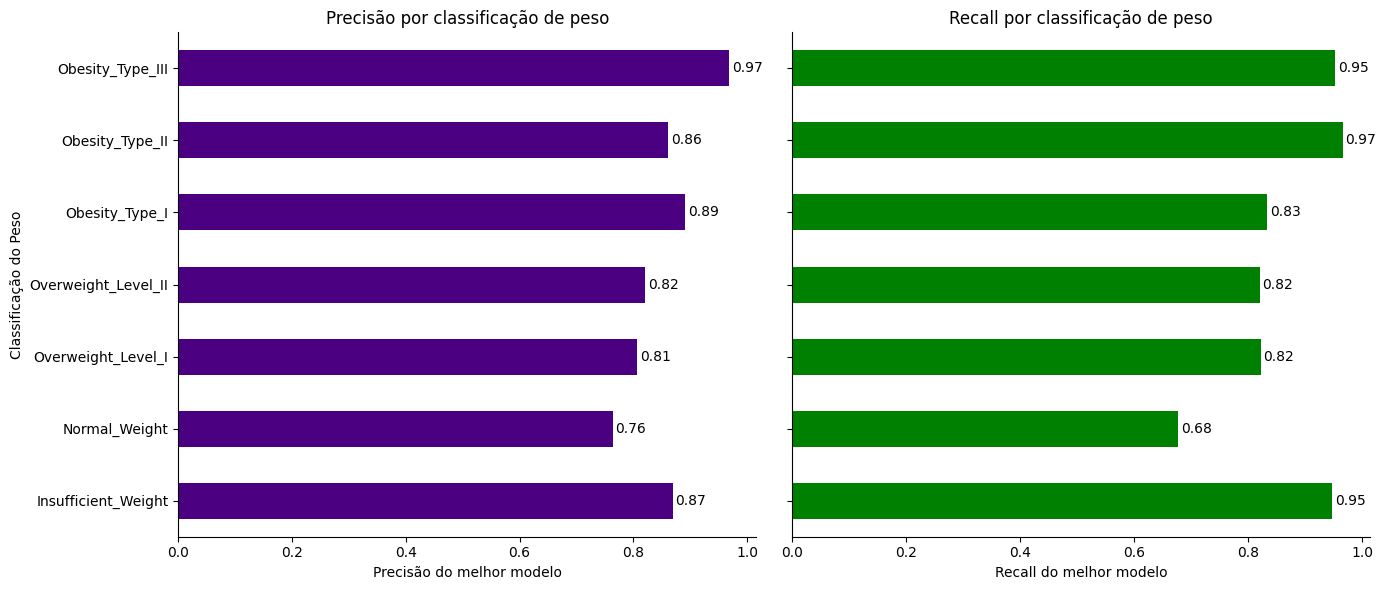

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Criando o gráfico
df_plot = df_report.iloc[:-3][['precision', 'recall', 'f1-score']] # removendo linhas como 'accuracy', 'macro avg', 'weighted avg'
df_plot = df_plot.sort_index(ascending = True) #ordenando
df_plot.index = ['Insufficient_Weight' ,'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'] #trocando o nome do index

# =========================
#  GRÁFICO 1: PRECISION
# =========================
ax = axs[0]
df_plot[['precision']].plot.barh(ax=ax, legend=False, color='indigo')

# Adicionando valores na barra
for barra in ax.patches:
    largura = barra.get_width()
    ax.text(
        largura + 0.005,
        barra.get_y() + barra.get_height() / 2,
        f"{largura:.2f}",
        va='center', ha='left'
    )

ax.set_title("Precisão por classificação de peso")
ax.set_xlabel("Precisão do melhor modelo")
ax.set_ylabel("Classificação do Peso")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# =========================
#  GRÁFICO 2: RECALL
# =========================

ax = axs[1]
df_plot[['recall']].plot.barh(ax=ax, legend=False, color='green')

for barra in ax.patches:
    largura = barra.get_width()
    ax.text(
        largura + 0.005,
        barra.get_y() + barra.get_height() / 2,
        f"{largura:.2f}",
        va='center', ha='left'
    )

ax.set_title("Recall por classificação de peso")
ax.set_xlabel("Recall do melhor modelo")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

In [40]:
# | Coluna        | Significa o quê?                                                     | Importância                                               |
# | ------------- | -------------------------------------------------------------------- | --------------------------------------------------------- |
# | **precision** | Das previsões feitas como “classe X”, quantas estavam certas?        | Evitar falsos positivos                                   |
# | **recall**    | Dos casos que realmente eram “classe X”, quantos o modelo encontrou? | Evitar falsos negativos                                   |
# | **f1-score**  | Combinação equilibrada de precision + recall                         | Avaliação geral (especialmente em classes desbalanceadas) |
# | **support**   | Quantos exemplos têm naquela classe                                  | Ajuda a interpretar as métricas                           |


In [41]:
resultados = pd.DataFrame(grid.cv_results_)
resultados['model_name'] = resultados['param_model'].astype(str)

# Separando so melhores resultados por modelo para realizar a comparação
melhores_por_modelo = (
    resultados
    .sort_values('mean_test_score', ascending=False)
    .drop_duplicates(subset='model_name')  # mantém a melhor combinação por modelo
    .set_index('model_name')[['mean_test_score', 'params']]
)

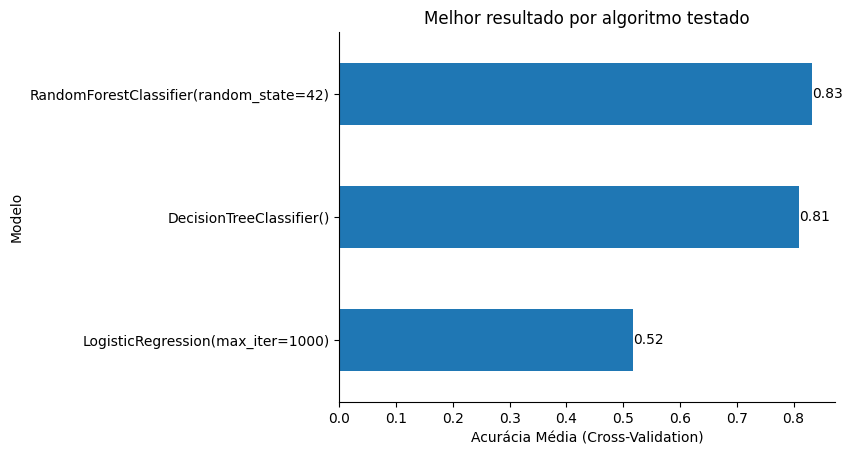

In [42]:
# Vamos vizualizar o resultado
ax = melhores_por_modelo['mean_test_score'].sort_values().plot.barh()

for barra in ax.patches:
    largura = barra.get_width()
    ax.text(
        largura + 0.001,                           # posição X do texto
        barra.get_y() + barra.get_height() / 2,    # posição Y centralizada
        f"{largura:.2f}",                          # formatação (2 casas decimais)
        va='center',
        ha='left'
    )

# Retirando as "molduras do gráfico"
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('Acurácia Média (Cross-Validation)')
plt.ylabel('Modelo')
plt.title('Melhor resultado por algoritmo testado')

plt.show()

## 4. Gerando JOBLIB

In [43]:
import joblib
#Criando joblib da predição
joblib.dump(grid,'RandomForest2.joblib')

['RandomForest2.joblib']